<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/MarketingChannel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-8d36bbe2e8bb>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0, 0], data=sorted_df,
<ipython-input-2-8d36bbe2e8bb>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1, 0], data=sorted_df,
<ipython-input-2-8d36bbe2e8bb>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1, 1], data=sorted_df,
<ipython-input-2-8d36bbe2e8bb>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effec

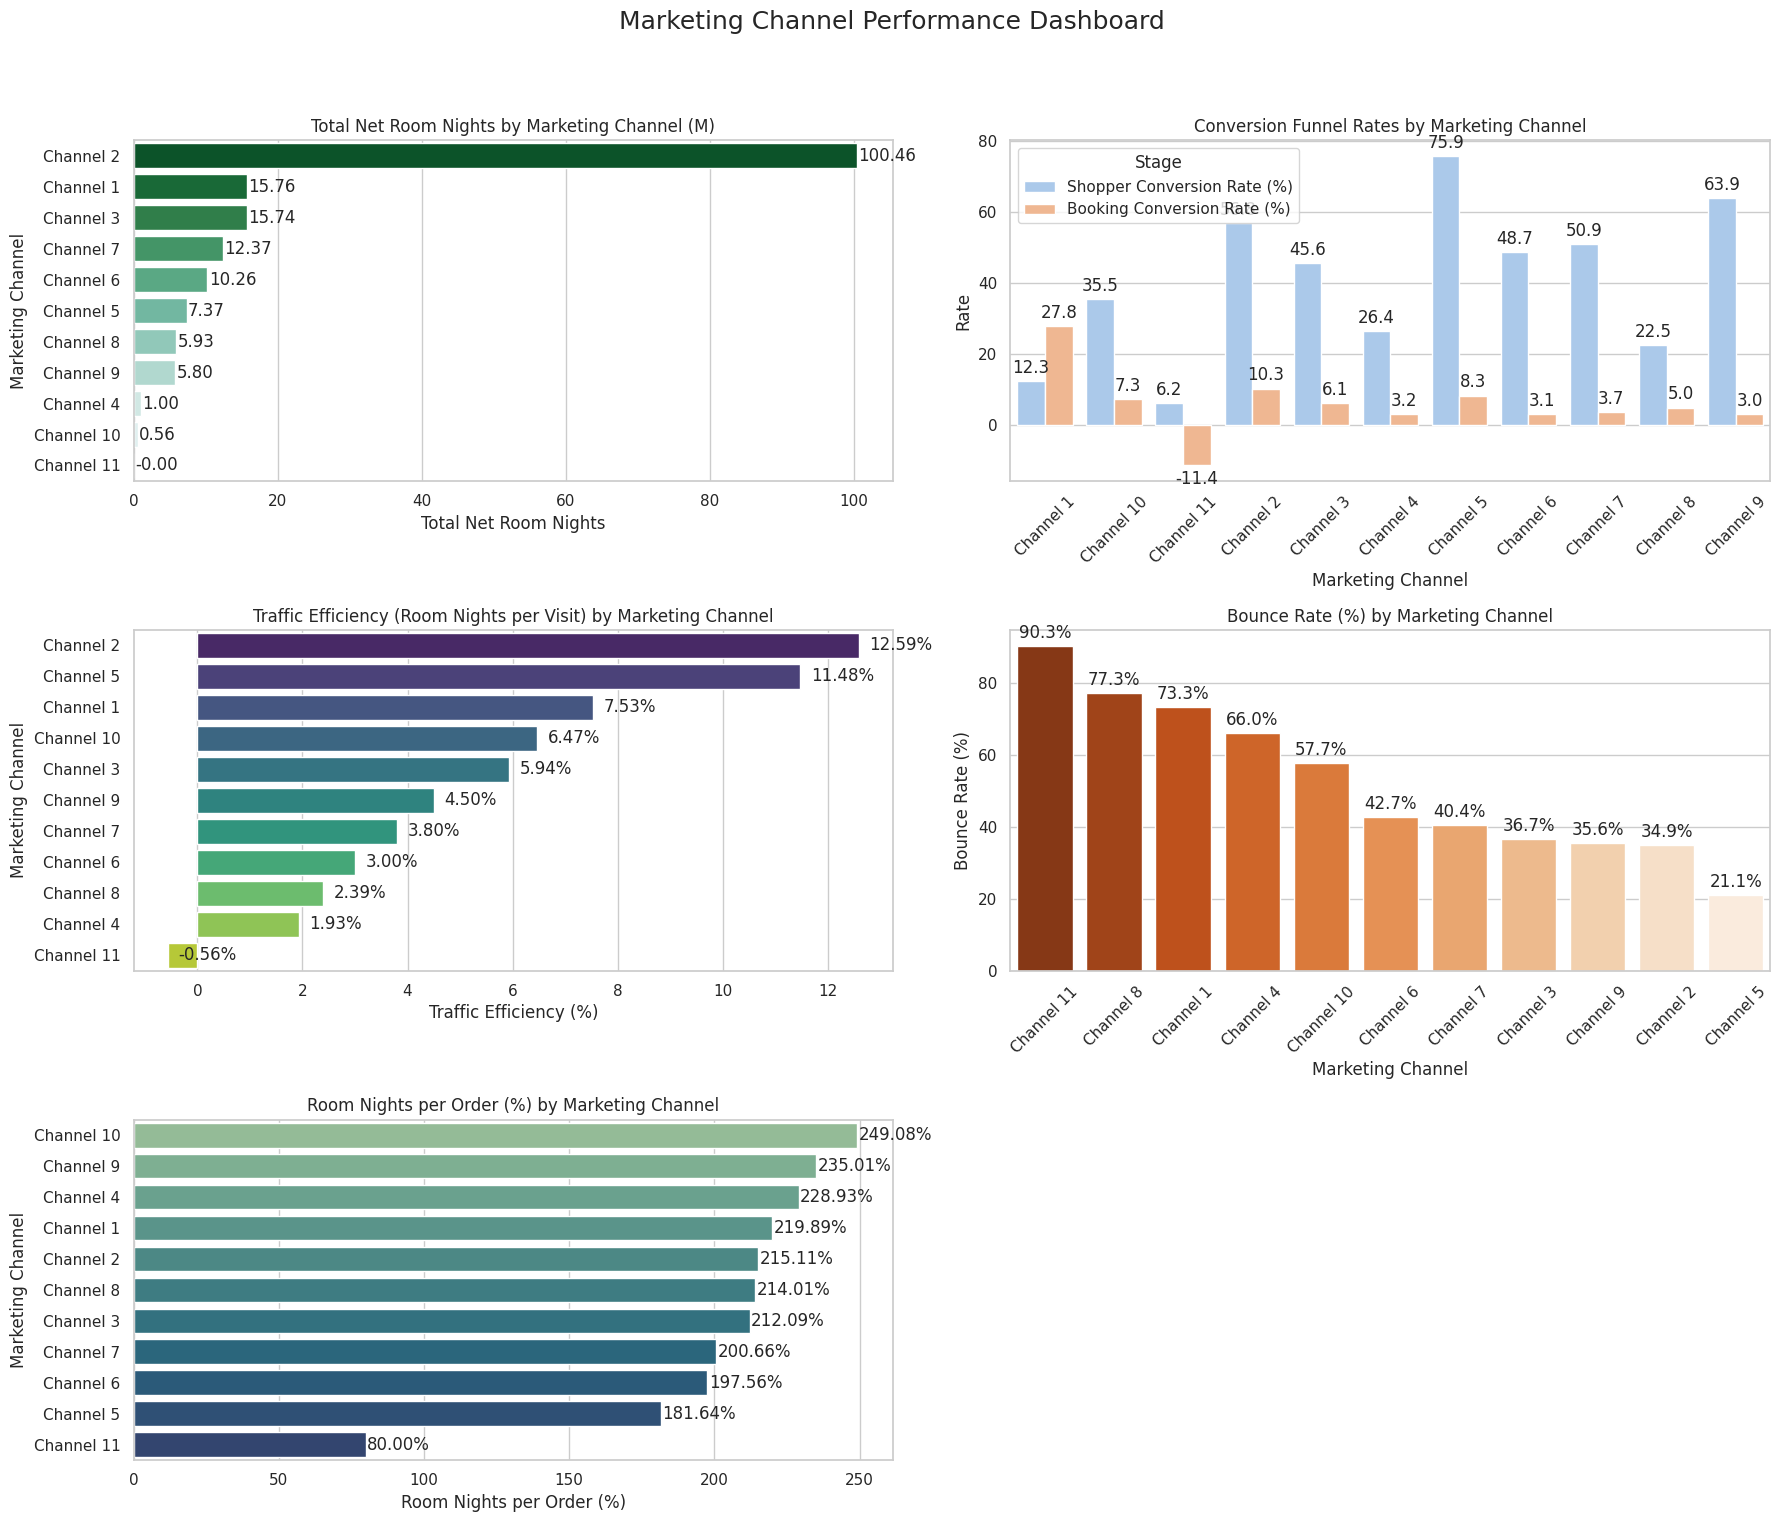

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/sample_data/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# Group by Marketing Channel
channel_summary = df.groupby("Marketing Channel").agg({
    "Visits": "sum",
    "Qualified Shoppers": "sum",
    "Net Orders": "sum",
    "Net Room Nights": "sum",
    "Bounced Visits": "sum"
}).reset_index()

# Calculate performance metrics
channel_summary["Shopper Conversion Rate (%)"] = (channel_summary["Qualified Shoppers"] / channel_summary["Visits"].replace(0, 1)) * 100
channel_summary["Shopper Conversion Rate (%)"] = channel_summary["Shopper Conversion Rate (%)"].round(2)

channel_summary["Visits (M)"] = (channel_summary["Visits"] / 1e6).round(2)

channel_summary["Booking Conversion Rate (%)"] = (channel_summary["Net Orders"] / channel_summary["Qualified Shoppers"].replace(0, 1)) * 100
channel_summary["Booking Conversion Rate (%)"] = channel_summary["Booking Conversion Rate (%)"].round(2)

channel_summary["Traffic Efficiency (%)"] = ((channel_summary["Net Room Nights"] / channel_summary["Visits"].replace(0, 1)) * 100).round(2)

channel_summary["Room Nights per Order (%)"] = ((channel_summary["Net Room Nights"] / channel_summary["Net Orders"].replace(0, 1)) * 100).round(2)

channel_summary["Bounce Rate (%)"] = (channel_summary["Bounced Visits"] / channel_summary["Visits"].replace(0, 1)) * 100
channel_summary["Bounce Rate (%)"] = channel_summary["Bounce Rate (%)"].round(2)

channel_summary["Total Net Room Nights"] = (channel_summary["Net Room Nights"] / 1e6).round(2)

# Set style
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle('Marketing Channel Performance Dashboard', fontsize=18)

# 1. Total Net Room Nights
sorted_df = channel_summary.sort_values("Total Net Room Nights", ascending=False)
sns.barplot(ax=axs[0, 0], data=sorted_df,
            y="Marketing Channel", x="Total Net Room Nights", palette="BuGn_r")
axs[0, 0].set_title('Total Net Room Nights by Marketing Channel (M)')
for i, val in enumerate(sorted_df["Total Net Room Nights"]):
    axs[0, 0].text(val + 0.2, i, f"{val:.2f}", va="center")

# 2. Conversion Funnel
conversion_data = pd.melt(
    channel_summary,
    id_vars="Marketing Channel",
    value_vars=["Shopper Conversion Rate (%)", "Booking Conversion Rate (%)"],
    var_name="Stage",
    value_name="Rate"
)
conv_sorted = conversion_data.sort_values("Rate", ascending=False)
sns.barplot(ax=axs[0, 1], data=conversion_data, x="Marketing Channel", y="Rate", hue="Stage", palette="pastel")
axs[0, 1].set_title("Conversion Funnel Rates by Marketing Channel")
axs[0, 1].tick_params(axis="x", rotation=45)
for bar in axs[0, 1].containers:
    axs[0, 1].bar_label(bar, fmt="%.1f", padding=3)

# 3. Traffic Efficiency
sorted_df = channel_summary.sort_values("Traffic Efficiency (%)", ascending=False)
sns.barplot(ax=axs[1, 0], data=sorted_df,
            y="Marketing Channel", x="Traffic Efficiency (%)", palette="viridis")
axs[1, 0].set_title("Traffic Efficiency (Room Nights per Visit) by Marketing Channel")
for i, val in enumerate(sorted_df["Traffic Efficiency (%)"]):
    axs[1, 0].text(val + 0.2, i, f"{val:.2f}%", va="center")

# 4. Bounce Rate
sorted_df = channel_summary.sort_values("Bounce Rate (%)", ascending=False)
sns.barplot(ax=axs[1, 1], data=sorted_df,
            x="Marketing Channel", y="Bounce Rate (%)", palette="Oranges_r")
axs[1, 1].set_title("Bounce Rate (%) by Marketing Channel")
axs[1, 1].tick_params(axis="x", rotation=45)
for bar in axs[1, 1].containers:
    axs[1, 1].bar_label(bar, fmt="%.1f%%", padding=3)

# 5. Room Nights per Order
sorted_df = channel_summary.sort_values("Room Nights per Order (%)", ascending=False)
sns.barplot(ax=axs[2, 0], data=sorted_df,
            y="Marketing Channel", x="Room Nights per Order (%)", palette="crest")
axs[2, 0].set_title("Room Nights per Order (%) by Marketing Channel")
for i, val in enumerate(sorted_df["Room Nights per Order (%)"]):
    axs[2, 0].text(val + 0.5, i, f"{val:.2f}%", va="center")

# Hide unused subplot
axs[2, 1].axis("off")

# Final layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
